In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
#df = pd.read_csv('data/Superstore.csv', encoding='latin-1')
file_path = '/content/drive/My Drive/Colab Notebooks/data/Superstore.csv'
df = pd.read_csv(file_path, encoding='latin-1')

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Rating,Discount,Profit
0,1.0,CA-2021-121258,2/26/2020,3/3/2020,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,TEC-PH-10003645,Technology,Accessories,Verbatim 25 GB 6x Blu-ray Single Layer Recorda...,13.980,2.0,4.1,0.0,6.1512
1,2.0,CA-2021-121258,2/26/2020,3/3/2020,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4.0,4.3,0.0,13.3200
2,3.0,CA-2021-119914,5/4/2020,5/9/2020,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2.0,3.3,0.0,72.9480
3,4.0,CA-2021-117646,8/21/2021,8/25/2021,Standard Class,SC-20845,Sung Chung,Consumer,United States,Louisville,...,West,OFF-ST-10000036,Office Supplies,Storage,Recycled Data-Pak for Archival Bound Computer ...,237.096,3.0,4.4,0.2,20.7459
4,5.0,CA-2021-117646,8/21/2021,8/25/2021,Standard Class,SC-20845,Sung Chung,Consumer,United States,Louisville,...,West,FUR-FU-10001037,Furniture,Furnishings,"DAX Charcoal/Nickel-Tone Document Frame, 5 x 7",22.752,3.0,3.8,0.2,7.1100


In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Rating',
       'Discount', 'Profit'],
      dtype='object')

**Exploratory** Data Analysis (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 9997
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9998 non-null   int64         
 1   Order ID        9998 non-null   object        
 2   Order Date      9998 non-null   datetime64[ns]
 3   Ship Date       9998 non-null   datetime64[ns]
 4   Ship Mode       9998 non-null   object        
 5   Customer ID     9998 non-null   object        
 6   Customer Name   9998 non-null   object        
 7   Segment         9998 non-null   object        
 8   Country/Region  9998 non-null   object        
 9   City            9998 non-null   object        
 10  State           9998 non-null   object        
 11  Postal Code     9998 non-null   int64         
 12  Region          9998 non-null   object        
 13  Product ID      9998 non-null   object        
 14  Category        9998 non-null   object        
 15  Sub-Categ

## Step 2: Preprocessing
Example - convert dates, handle missing values, and basic cleaning /
Convert data types in to correct format

In [ ]:
# Convert to datetime with automatic format detection
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='mixed', errors='coerce')
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed', errors='coerce')

# Convert Rating to numeric (decimals allowed), invalid entries become NaN
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Optional: Keep only ratings between 1 and 5
df.loc[(df['Rating'] < 1) | (df['Rating'] > 5), 'Rating'] = None

# Fill missing ratings with the mean of valid ones
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

# Drop rows where Product ID or Customer ID is missing
df = df.dropna(subset=['Product ID', 'Customer ID'])

# Coerce errors to NaN, fill missing with 0 (or choose a default), then cast to int
df['Postal Code'] = pd.to_numeric(df['Postal Code'], errors='coerce').fillna(0).astype(int)
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce').fillna(0).astype(int)
df['Row ID'] = pd.to_numeric(df['Row ID'], errors='coerce').fillna(0).astype(int)

# Clean column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

# Preview the cleaned DataFrame
df.head(10)


/tmp/ipython-input-6-1872504866.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Postal Code'] = pd.to_numeric(df['Postal Code'], errors='coerce').fillna(0).astype(int)
/tmp/ipython-input-6-1872504866.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce').fillna(0).astype(int)
/tmp/ipython-input-6-1872504866.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Rating,Discount,Profit
0,1,CA-2021-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,TEC-PH-10003645,Technology,Accessories,Verbatim 25 GB 6x Blu-ray Single Layer Recorda...,13.980,2,4.1,0.0,6.1512
1,2,CA-2021-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,4.3,0.0,13.3200
2,3,CA-2021-119914,2020-05-04,2020-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,3.3,0.0,72.9480
3,4,CA-2021-117646,2021-08-21,2021-08-25,Standard Class,SC-20845,Sung Chung,Consumer,United States,Louisville,...,West,OFF-ST-10000036,Office Supplies,Storage,Recycled Data-Pak for Archival Bound Computer ...,237.096,3,4.4,0.2,20.7459
4,5,CA-2021-117646,2021-08-21,2021-08-25,Standard Class,SC-20845,Sung Chung,Consumer,United States,Louisville,...,West,FUR-FU-10001037,Furniture,Furnishings,"DAX Charcoal/Nickel-Tone Document Frame, 5 x 7",22.752,3,3.8,0.2,7.1100
5,6,CA-2021-117646,2021-08-21,2021-08-25,Standard Class,SC-20845,Sung Chung,Consumer,United States,Louisville,...,West,OFF-PA-10001950,Office Supplies,Paper,Southworth 25% Cotton Antique Laid Paper & Env...,6.672,1,3.8,0.2,2.0850
6,7,CA-2018-122609,2018-11-12,2018-11-18,Standard Class,DP-13000,Darren Powers,Consumer,United States,Carrollton,...,Central,FUR-FU-10004587,Furniture,Furnishings,"GE General Use Halogen Bulbs, 100 Watts, 1 Bul...",25.128,3,4.0,0.6,-6.9102
7,8,CA-2018-122609,2018-11-12,2018-11-18,Standard Class,DP-13000,Darren Powers,Consumer,United States,Carrollton,...,Central,TEC-AC-10002567,Technology,Accessories,Logitech G602 Wireless Gaming Mouse,127.984,2,4.4,0.2,25.5968
8,9,US-2019-129007,2019-09-13,2019-09-15,First Class,KD-16615,Ken Dana,Corporate,United States,Anaheim,...,West,FUR-FU-10004973,Furniture,Furnishings,Flat Face Poster Frame,131.880,7,4.4,0.0,55.3896
9,10,US-2019-129007,2019-09-13,2019-09-15,First Class,KD-16615,Ken Dana,Corporate,United States,Anaheim,...,West,OFF-BI-10001628,Office Supplies,Binders,Acco Data Flex Cable Posts For Top & Bottom Lo...,25.032,3,4.5,0.2,7.8225


### 1.Check missing values


In [ ]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


### 2. Summary Statistics
understanding of numerical features such as `sales`, `profit` and `discounts`.

In [ ]:
print(df.describe())

            Row ID                     Order Date  \
count  9998.000000                           9998   
mean   4999.499900  2020-04-29 22:07:22.168433920   
min       1.000000            2018-01-03 00:00:00   
25%    2500.250000            2019-05-23 00:00:00   
50%    4999.500000            2020-06-26 00:00:00   
75%    7498.750000            2021-05-14 00:00:00   
max    9998.000000            2021-12-30 00:00:00   
std    2886.318159                            NaN   

                           Ship Date   Postal Code         Sales     Quantity  \
count                           9998   9998.000000   9998.000000  9998.000000   
mean   2020-05-03 21:11:55.103020544  55196.369174    229.782280     3.788858   
min              2018-01-07 00:00:00      0.000000      0.444000     1.000000   
25%              2019-05-27 00:00:00  23223.000000     17.280000     2.000000   
50%              2020-06-29 00:00:00  56831.500000     54.432000     3.000000   
75%              2021-05-18 00:00:00

### 3. Top Selling Products

In [ ]:
top_products = df['Product Name'].value_counts().head(10)
print(top_products)

Product Name
Staple envelope                                              48
Staples                                                      46
Easy-staple paper                                            46
Avery Non-Stick Binders                                      20
Staples in misc. colors                                      19
Staple remover                                               18
KI Adjustable-Height Table                                   18
Storex Dura Pro Binders                                      17
Staple-based wall hangings                                   16
Logitech 910-002974 M325 Wireless Mouse for Web Scrolling    15
Name: count, dtype: int64


### 4.Distribution of Ratings
Understanding user ratings helps determine whether we need to normalize scores.

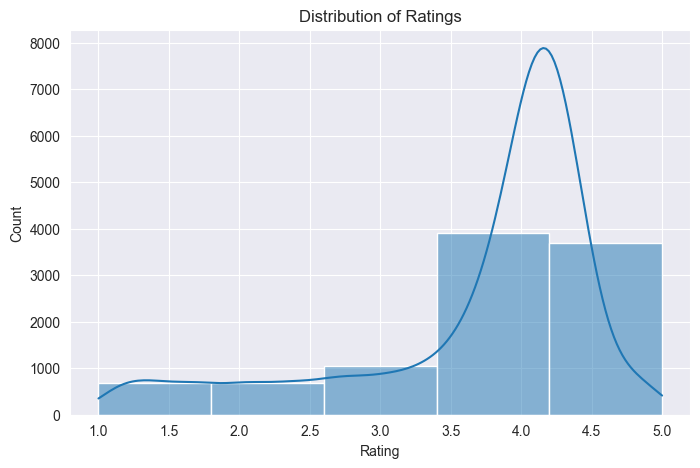

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Rating'], bins=5, kde=True)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.show()

## 5.Sales Trends Over Time
This identifies seasonal trends

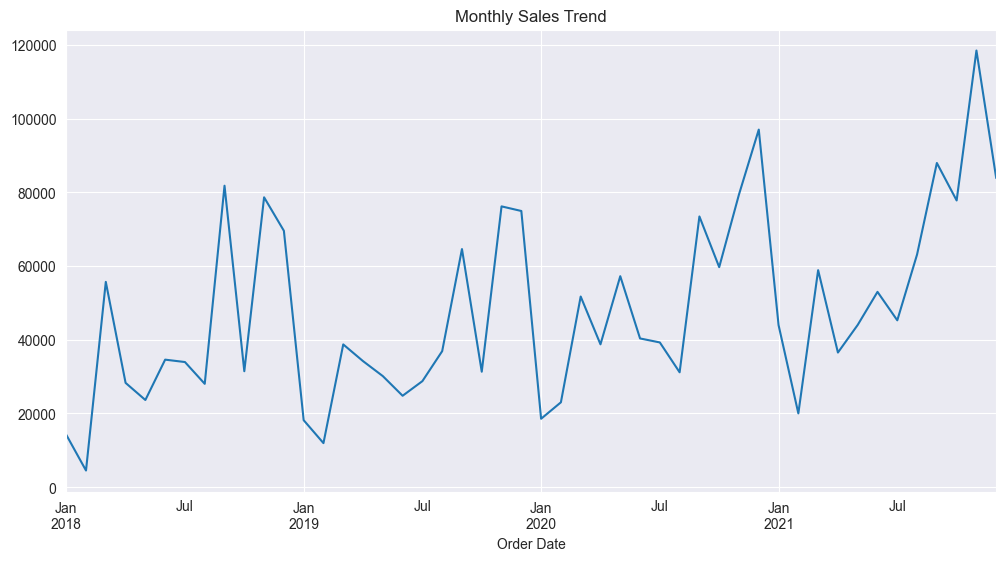

In [ ]:
data = df.copy()  # Create a copy of the original dataframe
data = data.set_index('Order Date')  # Set 'Order Date' as the index without modifying the original df

data.resample('ME')['Sales'].sum().plot(figsize=(12,6), title="Monthly Sales Trend")
plt.show()

### 6.Customer Segments Analysis

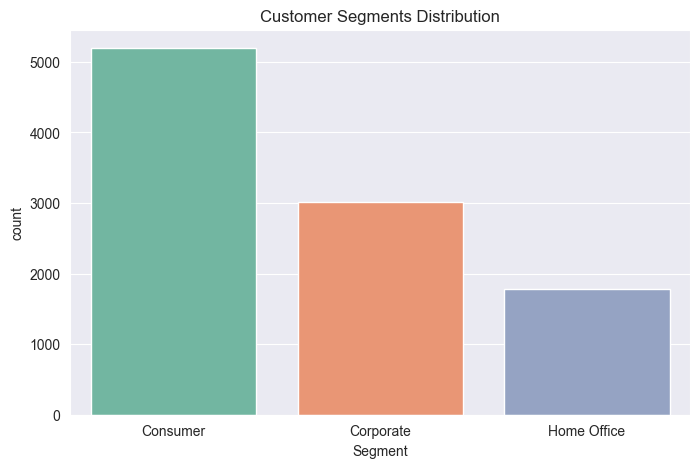

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Segment', data=df, palette='Set2' , hue='Segment', legend=False)
plt.title("Customer Segments Distribution")
plt.show()

### 7 Category & Sub-Category Sales

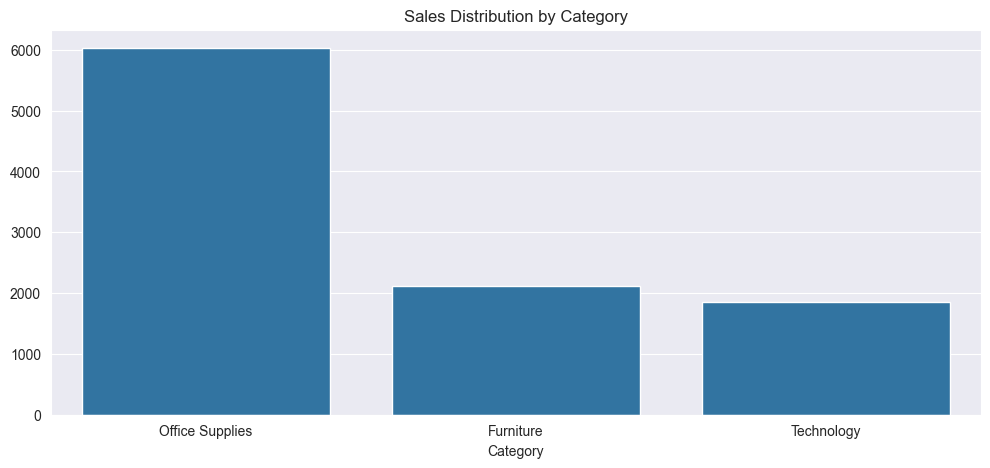

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x=df['Category'].value_counts().index, y=df['Category'].value_counts().values)
plt.title("Sales Distribution by Category")
plt.show()

### 8 Profit vs. Discount Analysis

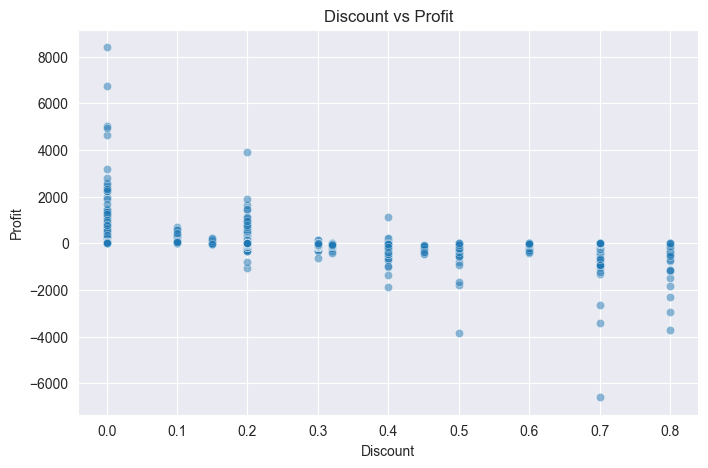

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Discount', y='Profit', data=df, alpha=0.5)
plt.title("Discount vs Profit")
plt.show()

### 9 Region-Wise Sales
**Used in context-aware recommendations**.

C:\Users\chami\AppData\Local\Temp\ipykernel_2468\4153622493.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Region'].value_counts().index, y=df['Region'].value_counts().values, palette="coolwarm")


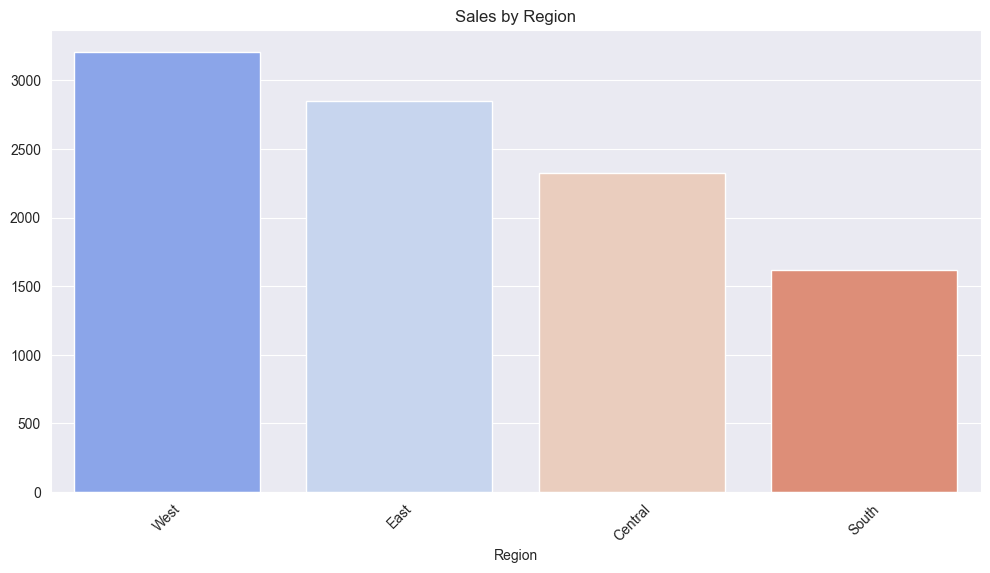

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Region'].value_counts().index, y=df['Region'].value_counts().values, palette="coolwarm")
plt.title("Sales by Region")
plt.xticks(rotation=45)
plt.show()

### 10.Most Loyal Customers (Highest Repeat Orders)

In [ ]:
loyal_customers = df['Customer ID'].value_counts().head(10)
print(loyal_customers)

Customer ID
WB-21850    37
PP-18955    34
MA-17560    34
JL-15835    34
CK-12205    32
SV-20365    32
EH-13765    32
JD-15895    32
AP-10915    31
EP-13915    31
Name: count, dtype: int64


In [ ]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Rating,Discount,Profit
0,1,CA-2021-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,TEC-PH-10003645,Technology,Accessories,Verbatim 25 GB 6x Blu-ray Single Layer Recorda...,13.980,2,4.1,0.0,6.1512
1,2,CA-2021-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,4.3,0.0,13.3200
2,3,CA-2021-119914,2020-05-04,2020-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,3.3,0.0,72.9480
3,4,CA-2021-117646,2021-08-21,2021-08-25,Standard Class,SC-20845,Sung Chung,Consumer,United States,Louisville,...,West,OFF-ST-10000036,Office Supplies,Storage,Recycled Data-Pak for Archival Bound Computer ...,237.096,3,4.4,0.2,20.7459
4,5,CA-2021-117646,2021-08-21,2021-08-25,Standard Class,SC-20845,Sung Chung,Consumer,United States,Louisville,...,West,FUR-FU-10001037,Furniture,Furnishings,"DAX Charcoal/Nickel-Tone Document Frame, 5 x 7",22.752,3,3.8,0.2,7.1100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994,US-2019-150630,2019-09-17,2019-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.200,3,4.3,0.2,15.5250
9994,9995,US-2019-150630,2019-09-17,2019-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,3.264,2,4.2,0.2,1.1016
9995,9996,US-2019-150630,2019-09-17,2019-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,East,OFF-AR-10004042,Office Supplies,Art,"BOSTON Model 1800 Electric Pencil Sharpeners, ...",86.304,6,4.3,0.2,9.7092
9996,9997,US-2019-150630,2019-09-17,2019-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,East,OFF-BI-10001525,Office Supplies,Binders,"Acco Pressboard Covers with Storage Hooks, 14 ...",6.858,6,4.0,0.7,-5.7150


### **1. Product Profiles**
**Aggregate sales, quantity, discount, and profit per product.**

In [ ]:
def create_product_profiles(df):
    product_profiles = df.groupby('Product ID').agg({
        'Product Name': 'first',
        'Category': 'first',
        'Sub-Category': 'first',
        'Sales': 'sum',
        'Quantity': 'sum',
        'Discount': 'mean',
        'Profit': 'sum',
        'Rating': ['mean', 'count']  # Average rating & number of ratings
    })

    product_profiles.columns = ['Product Name', 'Category', 'Sub-Category', 'Total Sales', 'Total Quantity',
                                'Avg Discount', 'Total Profit', 'Avg Rating', 'Num Ratings']
    return product_profiles.reset_index()

# Generate profiles
product_profiles = create_product_profiles(df)
product_profiles

,Product ID,Product Name,Category,Sub-Category,Total Sales,Total Quantity,Avg Discount,Total Profit,Avg Rating,Num Ratings
0,FUR-BO-10000112,"Bush Birmingham Collection Bookcase, Dark Cherry",Furniture,Bookcases,825.174,9,0.300000,-117.8820,4.000000,1
1,FUR-BO-10000330,"Sauder Camden County Barrister Bookcase, Plank...",Furniture,Bookcases,1064.624,10,0.100000,24.1960,3.766667,3
2,FUR-BO-10000362,Sauder Inglewood Library Bookcases,Furniture,Bookcases,2154.348,14,0.130000,311.1836,3.600000,5
3,FUR-BO-10000468,O'Sullivan 2-Shelf Heavy-Duty Bookcases,Furniture,Bookcases,723.842,21,0.183333,-133.1092,3.883333,6
4,FUR-BO-10000711,"Hon Metal Bookcases, Gray",Furniture,Bookcases,851.760,12,0.000000,229.9752,4.300000,2
...,...,...,...,...,...,...,...,...,...,...
1861,TEC-PH-10004912,Cisco SPA112 2 Port Phone Adapter,Technology,Phones,516.530,11,0.133333,87.3705,3.833333,3
1862,TEC-PH-10004922,RCA Visys Integrated PBX 8-Line Router,Technology,Phones,1085.238,19,0.120000,130.6305,4.080000,5
1863,TEC-PH-10004924,"SKILCRAFT Telephone Shoulder Rest, 2"" x 6.5"" x...",Technology,Phones,56.164,8,0.066667,13.0064,4.000000,3
1864,TEC-PH-10004959,Classic Ivory Antique Telephone ZL1810,Technology,Phones,341.666,4,0.100000,40.1960,3.800000,2


### **2. Customer Profiles**
**Aggregate purchase behavior per customer.**

In [ ]:
def create_customer_profiles(df):
    customer_profiles = df.groupby('Customer ID').agg({
        'Customer Name': 'first',
        'Segment': 'first',
        'Region': 'first',
        'Sales': 'sum',
        'Order ID': pd.Series.nunique,  # Number of unique orders
        'Discount': 'mean',
        'Profit': 'sum',
        'Product ID': pd.Series.nunique,  # Unique products bought
        'Rating': 'mean'  # Average rating given
    })

    customer_profiles.columns = ['Customer Name', 'Segment', 'Region', 'Total Spending', 'Num Orders',
                                 'Avg Discount', 'Total Profit', 'Unique Products Bought', 'Avg Rating Given']
    return customer_profiles.reset_index()


customer_profiles = create_customer_profiles(df)
customer_profiles

,Customer ID,Customer Name,Segment,Region,Total Spending,Num Orders,Avg Discount,Total Profit,Unique Products Bought,Avg Rating Given
0,AA-10315,Alex Avila,Consumer,Central,5563.560,5,0.090909,-362.8825,11,3.818182
1,AA-10375,Allen Armold,Consumer,West,1056.390,9,0.080000,277.3824,15,3.380000
2,AA-10480,Andrew Allen,Consumer,East,1790.512,4,0.016667,435.8274,12,3.508333
3,AA-10645,Anna Andreadi,Consumer,East,5086.935,6,0.063889,857.8033,18,3.916667
4,AB-10015,Aaron Bergman,Consumer,West,886.156,3,0.066667,129.3465,6,3.616667
...,...,...,...,...,...,...,...,...,...,...
790,XP-21865,Xylona Preis,Consumer,West,2374.658,11,0.046429,621.2300,28,4.032143
791,YC-21895,Yoseph Carroll,Corporate,West,5454.350,5,0.075000,1305.6290,8,4.112500
792,YS-21880,Yana Sorensen,Corporate,South,6720.444,8,0.050000,1778.2923,11,3.641667
793,ZC-21910,Zuschuss Carroll,Consumer,West,8025.707,13,0.254839,-1032.1490,31,3.780645


## **Collaborative Filtering (CF) Models Implemented**

## **1 SVD-based CF (Matrix Factorization using Surprise)**

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [ ]:
# Ensure string type for encoding
df['Customer ID'] = df['Customer ID'].astype(str)
df['Product ID'] = df['Product ID'].astype(str)
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Rating,Discount,Profit
0,1,CA-2021-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,TEC-PH-10003645,Technology,Accessories,Verbatim 25 GB 6x Blu-ray Single Layer Recorda...,13.980,2,4.1,0.0,6.1512
1,2,CA-2021-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,4.3,0.0,13.3200
2,3,CA-2021-119914,2020-05-04,2020-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,3.3,0.0,72.9480
3,4,CA-2021-117646,2021-08-21,2021-08-25,Standard Class,SC-20845,Sung Chung,Consumer,United States,Louisville,...,West,OFF-ST-10000036,Office Supplies,Storage,Recycled Data-Pak for Archival Bound Computer ...,237.096,3,4.4,0.2,20.7459
4,5,CA-2021-117646,2021-08-21,2021-08-25,Standard Class,SC-20845,Sung Chung,Consumer,United States,Louisville,...,West,FUR-FU-10001037,Furniture,Furnishings,"DAX Charcoal/Nickel-Tone Document Frame, 5 x 7",22.752,3,3.8,0.2,7.1100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994,US-2019-150630,2019-09-17,2019-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.200,3,4.3,0.2,15.5250
9994,9995,US-2019-150630,2019-09-17,2019-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,3.264,2,4.2,0.2,1.1016
9995,9996,US-2019-150630,2019-09-17,2019-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,East,OFF-AR-10004042,Office Supplies,Art,"BOSTON Model 1800 Electric Pencil Sharpeners, ...",86.304,6,4.3,0.2,9.7092
9996,9997,US-2019-150630,2019-09-17,2019-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,East,OFF-BI-10001525,Office Supplies,Binders,"Acco Pressboard Covers with Storage Hooks, 14 ...",6.858,6,4.0,0.7,-5.7150


In [ ]:
# Fit Label Encoders on full dataset before splitting
user_encoder = LabelEncoder()
product_encoder = LabelEncoder()

df['Customer ID Encoded'] = user_encoder.fit_transform(df['Customer ID'])
df['Product ID Encoded'] = product_encoder.fit_transform(df['Product ID'])
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Rating,Discount,Profit,Customer ID Encoded,Product ID Encoded
0,1,CA-2021-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Technology,Accessories,Verbatim 25 GB 6x Blu-ray Single Layer Recorda...,13.980,2,4.1,0.0,6.1512,190,1820
1,2,CA-2021-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,4.3,0.0,13.3200,190,1249
2,3,CA-2021-119914,2020-05-04,2020-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,3.3,0.0,72.9480,130,434
3,4,CA-2021-117646,2021-08-21,2021-08-25,Standard Class,SC-20845,Sung Chung,Consumer,United States,Louisville,...,Office Supplies,Storage,Recycled Data-Pak for Archival Bound Computer ...,237.096,3,4.4,0.2,20.7459,681,1292
4,5,CA-2021-117646,2021-08-21,2021-08-25,Standard Class,SC-20845,Sung Chung,Consumer,United States,Louisville,...,Furniture,Furnishings,"DAX Charcoal/Nickel-Tone Document Frame, 5 x 7",22.752,3,3.8,0.2,7.1100,681,172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994,US-2019-150630,2019-09-17,2019-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.200,3,4.3,0.2,15.5250,740,310
9994,9995,US-2019-150630,2019-09-17,2019-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,Office Supplies,Envelopes,Poly String Tie Envelopes,3.264,2,4.2,0.2,1.1016,740,861
9995,9996,US-2019-150630,2019-09-17,2019-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,Office Supplies,Art,"BOSTON Model 1800 Electric Pencil Sharpeners, ...",86.304,6,4.3,0.2,9.7092,740,611
9996,9997,US-2019-150630,2019-09-17,2019-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,Office Supplies,Binders,"Acco Pressboard Covers with Storage Hooks, 14 ...",6.858,6,4.0,0.7,-5.7150,740,696


Test MSE: 0.8873
Test RMSE: 0.9419
Test MAE: 0.7097
Test R²: -0.0541


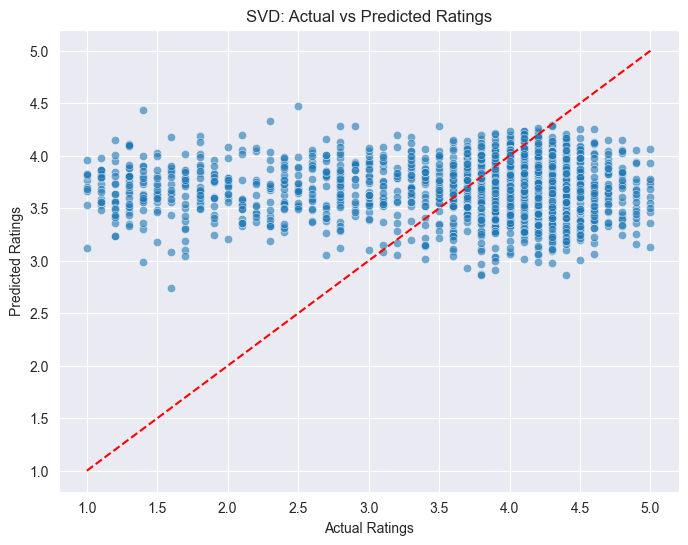

In [ ]:
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Load data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['Customer ID', 'Product ID Encoded', 'Rating']], reader)
# Stable train/test split
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Stable SVD model
model_svd = SVD(random_state=42)
model_svd.fit(trainset)
predictions = model_svd.test(testset)

# Extract true and predicted values
y_true = [pred.r_ui for pred in predictions]
y_pred = [pred.est for pred in predictions]

# Sklearn metrics
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R²: {r2:.4f}")

import matplotlib.pyplot as plt
import seaborn as sns

# Convert to numpy for plotting
y_true = np.array([pred.r_ui for pred in predictions])
y_pred = np.array([pred.est for pred in predictions])

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_true, y=y_pred, alpha=0.6)
plt.plot([1, 5], [1, 5], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('SVD: Actual vs Predicted Ratings')
plt.grid(True)
plt.show()

In [ ]:
# Function to get product recommendations using SVD
def get_svd_product_recommendations(user_id, model_svd, df, product_encoder, top_k=10):
    all_products = df['Product ID Encoded'].unique()
    rated_products = df[df['Customer ID'] == user_id]['Product ID Encoded'].unique()
    unrated_products = list(set(all_products) - set(rated_products))

    predictions = [
        (product, model_svd.predict(user_id, product).est) for product in unrated_products
    ]

    top_products = sorted(predictions, key=lambda x: x[1], reverse=True)[:top_k]

    # Decode Product IDs and return only product names
    top_product_names = [
        product_encoder.inverse_transform([product])[0] for product, _ in top_products
    ]

    return df[df['Product ID'].isin(top_product_names)][['Product ID', 'Product Name', 'Sub-Category']].drop_duplicates().head(top_k)

user_id = 'RB-19465'
get_svd_product_recommendations(user_id, model_svd, df, product_encoder, top_k=10)

,Product ID,Product Name,Sub-Category
558,OFF-PA-10003441,Xerox 226,Paper
656,OFF-EN-10002230,Airmail Envelopes,Envelopes
1791,FUR-CH-10001854,Office Star - Professional Matrix Back Chair w...,Chairs
1972,OFF-BI-10001249,Avery Heavy-Duty EZD View Binder with Locking ...,Binders
2531,OFF-BI-10000829,Avery Non-Stick Binders,Binders
2917,OFF-AR-10003338,"Eberhard Faber 3 1/2"" Golf Pencils",Art
3916,OFF-PA-10000246,Riverleaf Stik-Withit Designer Note Cubes,Paper
3959,FUR-FU-10001085,3M Polarizing Light Filter Sleeves,Furnishings
4213,OFF-PA-10001363,Xerox 1933,Paper
4503,TEC-PH-10000213,Seidio BD2-HK3IPH5-BK DILEX Case and Holster C...,Phones


**NCF**

In [ ]:
# Neural Collaborative Filtering (NCF) with TensorFlow

num_users = df['Customer ID Encoded'].nunique()
num_products = df['Product ID Encoded'].nunique()

# Model Architecture
user_input = Input(shape=(1,))
product_input = Input(shape=(1,))

user_embedding = Embedding(num_users, 50)(user_input)
product_embedding = Embedding(num_products, 50)(product_input)

user_vec = Flatten()(user_embedding)
product_vec = Flatten()(product_embedding)

concat = Concatenate()([user_vec, product_vec])

dense1 = Dense(128, activation='relu')(concat)
dense2 = Dense(64, activation='relu')(dense1)
out = Dense(1)(dense2)

ncf_model = Model([user_input, product_input], out)
ncf_model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Train NCF Model
X = [df['Customer ID Encoded'].values, df['Product ID Encoded'].values]
y = df['Rating'].values

ncf_model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

print("Neural Collaborative Filtering Model Trained Successfully!")


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 5.2474 - mae: 1.8164 - val_loss: 0.5792 - val_mae: 0.6563
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8101 - mae: 0.6920 - val_loss: 0.5043 - val_mae: 0.5665
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6897 - mae: 0.6402 - val_loss: 0.7703 - val_mae: 0.7405
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6420 - mae: 0.6226 - val_loss: 0.6711 - val_mae: 0.6537
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5544 - mae: 0.5710 - val_loss: 0.7822 - val_mae: 0.6955
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4132 - mae: 0.4805 - val_loss: 0.7300 - val_mae: 0.6499
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2564 - mae: 0.3809 - val_loss: 0.8535 - val_mae: 0.7109
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1539 - mae: 0.3008 - val_loss: 0.9076 - val_mae: 0.7288
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Get test set
test_df = df.tail(50).copy()

# Assuming test_df is a holdout set
X_test = [test_df['Customer ID Encoded'].values, test_df['Product ID Encoded'].values]
y_test = test_df['Rating'].values

predictions = ncf_model.predict(X_test).flatten()

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R²: {r2:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Test MSE: 0.8284
Test RMSE: 0.9101
Test MAE: 0.7554
Test R²: -11.0233


In [ ]:
# Function to get product recommendations using NCF
def get_ncf_product_recommendations(user_id, ncf_model, df, user_encoder, product_encoder, top_k=10):
    # Encode user & product IDs
    user_idx = user_encoder.transform([user_id])[0]

    all_products = df['Product ID Encoded'].unique()
    rated_products = df[df['Customer ID Encoded'] == user_idx]['Product ID Encoded'].unique()

    unrated_products = list(set(all_products) - set(rated_products))

    # Broadcast user index to match unrated_products size
    predictions = ncf_model.predict([np.full(len(unrated_products), user_idx), np.array(unrated_products)], verbose=0)

    # Get top-K recommended products
    top_indices = np.argsort(predictions.flatten())[::-1][:top_k]
    top_product_names = [
        product_encoder.inverse_transform([unrated_products[i]])[0] for i in top_indices
    ]

    return (df[df['Product ID'].isin(top_product_names)][['Product ID', 'Product Name', 'Sub-Category']]).drop_duplicates().head(top_k)


# Example usage
user_id = "RB-19465"  # Replace with an actual user ID from the dataset
(get_ncf_product_recommendations(user_id, ncf_model, df, user_encoder, product_encoder, top_k=10))


,Product ID,Product Name,Sub-Category
480,OFF-ST-10000689,"Fellowes Strictly Business Drawer File, Letter...",Storage
496,OFF-BI-10002498,Clear Mylar Reinforcing Strips,Binders
513,OFF-AR-10003811,Newell 327,Art
521,OFF-BI-10000285,XtraLife ClearVue Slant-D Ring Binders by Card...,Binders
531,FUR-CH-10000595,Safco Contoured Stacking Chairs,Chairs
851,OFF-PA-10001870,Xerox 202,Paper
1150,TEC-CO-10004202,Brother DCP1000 Digital 3 in 1 Multifunction M...,Copiers
1789,TEC-AC-10004568,Maxell LTO Ultrium - 800 GB,Accessories
2318,TEC-AC-10003095,Logitech G35 7.1-Channel Surround Sound Headset,Accessories
7292,TEC-MA-10001856,Okidata C610n Printer,Machines


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

# Fill missing values
df.fillna("", inplace=True)

# Drop duplicates
df = df.drop_duplicates(subset=['Product Name'])

# Reset index so that indices match tf-idf matrix and similarity arrays
df = df.reset_index(drop=True)

# Create a combined text feature
df['text_features'] = df['Product Name'] + " " + df['Sub-Category']

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['text_features'])

# Encode Categorical Features
encoder = LabelEncoder()
df['Sub-Category Encoded'] = encoder.fit_transform(df['Sub-Category'])

# Normalize Numerical Features
scaler = MinMaxScaler()
df[['Sales', 'Discount']] = scaler.fit_transform(df[['Sales', 'Discount']])

# Compute Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

**Compute** Similarities

In [ ]:
# Compute Cosine Similarity for Text Features
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Compute Distance-based Similarities for Numerical & Categorical Features
def compute_hybrid_similarity(index):
    text_score = cosine_sim[index]
    category_score = (df['Sub-Category Encoded'].values == df.iloc[index]['Sub-Category Encoded']).astype(int)
    price_score = 1 - np.abs(df['Sales'].values - df.iloc[index]['Sales'])

    # Weighted Combination
    hybrid_score = (0.5 * text_score) + (0.3 * category_score) + (0.2 * price_score)
    return hybrid_score

In [ ]:
### ** Recommendation Function**

def recommend_products(product_id, top_k=5):
    # Find index of the product
    index = df[df['Product ID'] == product_id].index[0]

    # Compute similarity scores
    similarity_scores = compute_hybrid_similarity(index)

    # Add similarity scores to a copy of the DataFrame
    df_with_scores = df.copy()
    df_with_scores['Similarity Score'] = similarity_scores

    # Get Top-K Similar Products (excluding the item itself)
    top_recommendations = df_with_scores.sort_values(by='Similarity Score', ascending=False).iloc[1:top_k+1]

    return top_recommendations[['Product ID', 'Product Name', 'Sub-Category', 'Similarity Score']]


# Example Usage
product_id = "FUR-BO-10001798"
recommend_products(product_id, top_k=10)

,Product ID,Product Name,Sub-Category,Similarity Score
1531,FUR-BO-10000112,"Bush Birmingham Collection Bookcase, Dark Cherry",Bookcases,0.772468
709,FUR-BO-10003441,"Bush Westfield Collection Bookcases, Fully Ass...",Bookcases,0.725742
264,FUR-BO-10004709,"Bush Westfield Collection Bookcases, Medium Ch...",Bookcases,0.723322
1350,FUR-BO-10003450,"Bush Westfield Collection Bookcases, Dark Cher...",Bookcases,0.722843
1469,FUR-BO-10003660,"Bush Cubix Collection Bookcases, Fully Assembled",Bookcases,0.721998
827,FUR-BO-10002206,"Bush Saratoga Collection 5-Shelf Bookcase, Han...",Bookcases,0.709482
1817,FUR-BO-10001567,"Bush Westfield Collection Bookcases, Dark Cher...",Bookcases,0.692251
572,FUR-BO-10004015,"Bush Andora Bookcase, Maple/Graphite Gray Finish",Bookcases,0.685920
1591,FUR-BO-10004218,Bush Heritage Pine Collection 5-Shelf Bookcase...,Bookcases,0.673096
1512,FUR-BO-10002916,"Rush Hierlooms Collection 1"" Thick Stackable B...",Bookcases,0.659826


In [ ]:
import numpy as np

# Ground truth dictionary: {product_id: [list of actual similar product IDs]}
ground_truth = {
    "OFF-AP-10000576": ["OFF-AP-10000938", "OFF-AP-10000326","OFF-AP-10001293","OFF-AP-10002203","OFF-AP-10002892"],
    "FUR-BO-10001798":["FUR-BO-10004729", "FUR-BO-10004833","FUR-BO-10002206","FUR-BO-10003965","FUR-BO-10002213"],
    "FUR-TA-10000617": ["FUR-TA-10002041","FUR-TA-10001889","FUR-TA-10001768","FUR-TA-10002774","FUR-TA-10001095","FUR-TA-10002903","FUR-TA-10004607"]

    # Add more known mappings
}

# Recommendation function already defined
# def recommend_products(product_id, top_k): ...

def precision_at_k(predicted, actual, k):
    predicted = predicted[:k]
    if not predicted:
        return 0.0
    return len(set(predicted) & set(actual)) / len(predicted)

def recall_at_k(predicted, actual, k):
    predicted = predicted[:k]
    if not actual:
        return 0.0
    return len(set(predicted) & set(actual)) / len(actual)

def evaluate_model(ground_truth, k=5):
    precisions = []
    recalls = []

    for product_id, actual_similars in ground_truth.items():
        try:
            # Get predicted similar product IDs
            predicted_df = recommend_products(product_id, top_k=k)
            predicted_ids = predicted_df['Product ID'].tolist()

            p = precision_at_k(predicted_ids, actual_similars, k)
            r = recall_at_k(predicted_ids, actual_similars, k)

            precisions.append(p)
            recalls.append(r)

            print(f"Product: {product_id} | Precision@{k}: {p:.2f} | Recall@{k}: {r:.2f}")

        except Exception as e:
            print(f"Skipping {product_id}: {e}")

    avg_precision = np.mean(precisions)
    avg_recall = np.mean(recalls)

    print(f"\nAverage Precision@{k}: {avg_precision:.3f}")
    print(f"Average Recall@{k}: {avg_recall:.3f}")

# Example evaluation
evaluate_model(ground_truth, k=10)


Product: OFF-AP-10000576 | Precision@10: 0.30 | Recall@10: 0.60
Product: FUR-BO-10001798 | Precision@10: 0.10 | Recall@10: 0.20
Product: FUR-TA-10000617 | Precision@10: 0.20 | Recall@10: 0.29

Average Precision@10: 0.200
Average Recall@10: 0.362


**BERT**

In [ ]:
### **1️⃣ Compute & Store BERT Embeddings**
import torch
from sklearn.metrics.pairwise import cosine_similarity
from transformers import AutoTokenizer, AutoModel

# Load BERT Model & Tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

# Ensure no NaN values in product names
df['Product Name'].fillna("", inplace=True)

# Function to Compute Product Embeddings
def get_product_embedding(product_name):
    inputs = tokenizer(product_name, return_tensors='pt', truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Compute Embeddings for All Products
df['embedding'] = df['Product Name'].apply(get_product_embedding)

# Convert Embeddings to NumPy Array
embedding_matrix = np.vstack(df['embedding'].values)

E:\New Project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\chami\AppData\Local\Temp\ipykernel_2468\1422959896.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product Name'].fillna("", inplace=True)


In [ ]:
### **2️⃣ Define Recommendation Function**

def recommend_products(product_id, top_k=10):
    # Get index of the product
    product_index = df[df['Product ID'] == product_id].index[0]

    # Compute Cosine Similarity
    product_embedding = embedding_matrix[product_index].reshape(1, -1)
    similarities = cosine_similarity(product_embedding, embedding_matrix).flatten()

    # Add similarity scores to a copy of the DataFrame
    df_with_scores = df.copy()
    df_with_scores['Similarity Score'] = similarities

    # Get Top-K Similar Products (excluding the item itself)
    top_recommendations = df_with_scores.sort_values(by='Similarity Score', ascending=False).iloc[1:top_k+1]

    return top_recommendations[['Product ID', 'Product Name', 'Sub-Category', 'Similarity Score']]


### **3️⃣ Get Recommendations**

product_id = "FUR-BO-10001798"  # Replace with an actual product ID
recommend_products(product_id, top_k=10)

,Product ID,Product Name,Sub-Category,Similarity Score
1531,FUR-BO-10000112,"Bush Birmingham Collection Bookcase, Dark Cherry",Bookcases,0.859849
888,FUR-BO-10004467,Bestar Classic Bookcase,Bookcases,0.828403
264,FUR-BO-10004709,"Bush Westfield Collection Bookcases, Medium Ch...",Bookcases,0.797687
1350,FUR-BO-10003450,"Bush Westfield Collection Bookcases, Dark Cher...",Bookcases,0.794048
709,FUR-BO-10003441,"Bush Westfield Collection Bookcases, Fully Ass...",Bookcases,0.793099
1469,FUR-BO-10003660,"Bush Cubix Collection Bookcases, Fully Assembled",Bookcases,0.771063
1651,FUR-TA-10004442,Riverside Furniture Stanwyck Manor Table Series,Tables,0.756449
365,FUR-BO-10001972,O'Sullivan 4-Shelf Bookcase in Odessa Pine,Bookcases,0.753679
1642,FUR-BO-10004690,O'Sullivan Cherrywood Estates Traditional Barr...,Bookcases,0.752138
1039,FUR-BO-10000362,Sauder Inglewood Library Bookcases,Bookcases,0.744617


**ENSEMBLE**

In [ ]:
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModel
from surprise import SVD, Dataset, Reader
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate
from sklearn.preprocessing import LabelEncoder

# Load BERT Model for CBF
bert_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
bert_model = AutoModel.from_pretrained("bert-base-uncased")

def get_product_embedding(product_name):
    inputs = bert_tokenizer(product_name, return_tensors='pt', truncation=True, padding=True)
    with torch.no_grad():
        outputs = bert_model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Load dataset (assuming df is preprocessed with 'Customer ID', 'Product ID', 'Rating')
user_encoder = LabelEncoder()
product_encoder = LabelEncoder()
df['Customer ID Encoded'] = user_encoder.fit_transform(df['Customer ID'].astype(str))
df['Product ID Encoded'] = product_encoder.fit_transform(df['Product ID'].astype(str))

# Generate CBF embeddings
product_embeddings = {pid: get_product_embedding(name) for pid, name in zip(df['Product ID Encoded'], df['Product Name'])}

# Collaborative Filtering - SVD
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['Customer ID Encoded', 'Product ID Encoded', 'Rating']], reader)
trainset = data.build_full_trainset()
model_svd = SVD()
model_svd.fit(trainset)

# Neural Collaborative Filtering (NCF)
num_users = df['Customer ID Encoded'].nunique()
num_products = df['Product ID Encoded'].nunique()

user_input = Input(shape=(1,))
product_input = Input(shape=(1,))

user_embedding = Dense(50, activation='relu')(user_input)
product_embedding = Dense(50, activation='relu')(product_input)

concat = Concatenate()([user_embedding, product_embedding])
dense1 = Dense(128, activation='relu')(concat)
dense2 = Dense(64, activation='relu')(dense1)
out = Dense(1)(dense2)

ncf_model = Model([user_input, product_input], out)
ncf_model.compile(loss='mse', optimizer='adam', metrics=['mae'])
ncf_model.fit([df['Customer ID Encoded'].values, df['Product ID Encoded'].values], df['Rating'].values, epochs=5, batch_size=32, validation_split=0.2)

# Meta-Learner Model to Combine SVD, NCF, and CBF
meta_input = Input(shape=(3,))  # Inputs: SVD score, NCF score, CBF similarity
meta_dense = Dense(16, activation='relu')(meta_input)
meta_out = Dense(1, activation='sigmoid')(meta_dense)
meta_model = Model(meta_input, meta_out)
meta_model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Generate training data for meta-learning
meta_features = []
meta_labels = []
for _, row in df.iterrows():
    user_idx = row['Customer ID Encoded']
    product_idx = row['Product ID Encoded']

    svd_score = model_svd.predict(user_idx, product_idx).est
    ncf_score = ncf_model.predict([np.array([user_idx]), np.array([product_idx])])[0][0]
    cbf_similarity = np.dot(product_embeddings[product_idx], product_embeddings[product_idx])  # Self-similarity

    meta_features.append([svd_score, ncf_score, cbf_similarity])
    meta_labels.append(row['Rating'])

meta_model.fit(np.array(meta_features), np.array(meta_labels), epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 429.2640 - mae: 14.5718 - val_loss: 11.0988 - val_mae: 2.6521
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.9643 - mae: 1.7578 - val_loss: 3.5351 - val_mae: 1.6322
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.6650 - mae: 1.3222 - val_loss: 2.6196 - val_mae: 1.3212
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4251 - mae: 1.2682 - val_loss: 2.3041 - val_mae: 1.2109
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6384 - mae: 1.3087 - val_loss: 5.3248 - val_mae: 2.0948
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1

# Step 7: Context-Aware Adjustment
### Example - apply time/region/discount as weight
Inputs - City', 'State', 'Region', 'Profit', 'Discount'

In [ ]:
import numpy as np
import pandas as pd
import torch
from surprise import SVD, Dataset, Reader
from transformers import AutoTokenizer, AutoModel
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
user_encoder = LabelEncoder()
product_encoder = LabelEncoder()
df['Customer ID Encoded'] = user_encoder.fit_transform(df['Customer ID'].astype(str))
df['Product ID Encoded'] = product_encoder.fit_transform(df['Product ID'].astype(str))

# Train SVD model for Collaborative Filtering (CF)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['Customer ID Encoded', 'Product ID Encoded', 'Rating']], reader)
trainset = data.build_full_trainset()
svd_model = SVD()
svd_model.fit(trainset)

# BERT-based content embeddings for product names
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

def get_product_embedding(product_name):
    inputs = tokenizer(product_name, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

df['Product Embedding'] = df['Product Name'].apply(get_product_embedding)

# Prepare context features
context_features = ['City', 'State', 'Region', 'Profit', 'Discount']
df[context_features] = df[context_features].apply(lambda x: LabelEncoder().fit_transform(x))

# Get collaborative filtering score (SVD score)
def get_svd_score(user_id, product_id):
    return svd_model.predict(user_id, product_id).est

df['SVD Score'] = df.apply(lambda x: get_svd_score(x['Customer ID Encoded'], x['Product ID Encoded']), axis=1)

# Feature Matrix (Product Embedding + Context Features + SVD Score)
X = np.hstack([
    np.stack(df['Product Embedding'].values),  # BERT embeddings
    df[context_features].values,  # Context features
    df[['SVD Score']].values  # Collaborative Filtering score
])

# To recommend products, we need to generate a score for each product for each user
# Function to get product scores for a specific user
def get_product_scores_for_user_df(user_id):
    user_data = df[df['Customer ID'] == user_id]

    # Extract features
    embeddings = np.stack(user_data['Product Embedding'].values)
    context = user_data[context_features].values
    svd_scores = user_data[['SVD Score']].values

    # Combined feature score can change this logic
    X_user = np.hstack([embeddings, context, svd_scores])
    product_scores = X_user.sum(axis=1)

    # Compute Similarity Scores (using cosine similarity to a mean embedding)
    user_embedding_mean = embeddings.mean(axis=0).reshape(1, -1)
    similarity_scores = cosine_similarity(user_embedding_mean, embeddings).flatten()

    # Create DataFrame with scores
    scores_df = pd.DataFrame({
        'Product ID Encoded': user_data['Product ID Encoded'].values,
        'Score': product_scores,
        'Similarity': similarity_scores
    })

    # Merge with product details
    merged = scores_df.merge(
        df[['Product ID Encoded', 'Product ID', 'Product Name', 'Sub-Category', 'SVD Score']],
        on='Product ID Encoded',
        how='left'
    )

    # Final sorted DataFrame
    merged = merged.sort_values(by='Score', ascending=False)

    return merged[['Product ID', 'Product Name', 'Sub-Category', 'SVD Score', 'Similarity', 'Score']]




Final Recomendation

In [ ]:
# Recommendation function
def get_hybrid_recommendations_with_scores(user_id, top_k=10):
    user_idx = user_encoder.transform([user_id])[0]
    all_products = df['Product ID Encoded'].unique()
    rated_products = df[df['Customer ID Encoded'] == user_idx]['Product ID Encoded'].unique()
    unrated_products = list(set(all_products) - set(rated_products))

    scores = []
    for product in unrated_products:
        # SVD score
        svd_score = model_svd.predict(user_idx, product).est

        # NCF score
        ncf_score = ncf_model.predict([np.array([user_idx]), np.array([product])])[0][0]

        # CBF similarity score
        cbf_similarity = np.dot(product_embeddings[product], product_embeddings[product])

        # Final hybrid score (using meta-model)
        final_score = meta_model.predict(np.array([[svd_score, ncf_score, cbf_similarity]]))[0][0]

        # Append all scores to the list
        scores.append({
            'Product ID': product,
            'SVD Score': svd_score,
            'NCF Score': ncf_score,
            'CBF Similarity': cbf_similarity,
            'Hybrid Score': final_score
        })

    # Sort by hybrid score
    top_products = sorted(scores, key=lambda x: x['Hybrid Score'], reverse=True)[:top_k]

    # Convert to DataFrame for better readability
    recommendations_df = pd.DataFrame(top_products)

    # Merge with original product data (if necessary) to get full product details
    recommendations_df = recommendations_df.merge(df[['Product ID Encoded', 'Product Name', 'Sub-Category']],
                                                  left_on='Product ID',
                                                  right_on='Product ID Encoded',
                                                  how='left')

    return recommendations_df[['Product ID', 'Product Name', 'Sub-Category', 'SVD Score', 'NCF Score', 'CBF Similarity', 'Hybrid Score']]


user_id = "RB-19465"
recommendations_with_scores = get_hybrid_recommendations_with_scores(user_id, top_k=10)
recommendations_with_scores


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━

,Product ID,Product Name,Sub-Category,SVD Score,NCF Score,CBF Similarity,Hybrid Score
0,666,"GBC White Gloss Covers, Plain Front",Binders,3.720495,2.298192,128.680786,1.000000
1,54,Global Highback Leather Tilter in Burgundy,Chairs,3.781391,5.368409,115.469154,1.000000
2,78,Office Star Flex Back Scooter Chair with White...,Chairs,3.612942,5.203477,115.539948,1.000000
3,97,"Global High-Back Leather Tilter, Burgundy",Chairs,3.549678,5.178580,112.860992,0.999999
4,1489,Imation Swivel Flash Drive USB flash drive - 8 GB,Accessories,3.380180,1.531557,124.666824,0.999999
5,56,High-Back Leather Manager's Chair,Chairs,3.853933,5.355848,110.982315,0.999999
6,1539,Memorex Mini Travel Drive 32 GB USB 2.0 Flash ...,Accessories,3.648077,1.504249,122.187286,0.999999
7,1462,Memorex Mini Travel Drive 16 GB USB 2.0 Flash ...,Accessories,3.956556,1.546327,121.400902,0.999999
8,1512,Anker Ultra-Slim Mini Bluetooth 3.0 Wireless K...,Accessories,3.736209,1.518978,121.161713,0.999999
9,1517,Memorex Mini Travel Drive 8 GB USB 2.0 Flash D...,Accessories,3.795681,1.516261,120.257507,0.999999


In [ ]:
user_id = "RB-19465"
personalized_scores_df = get_product_scores_for_user_df(user_id)
personalized_scores_df.head(5)# Top 5 recommendations for the user

,Product ID,Product Name,Sub-Category,SVD Score,Similarity,Score
4,OFF-PA-10001001,Snap-A-Way Black Print Carbonless Speed Messag...,Paper,3.574361,0.790522,1596.548812
0,OFF-PA-10003256,Avery Personal Creations Heavyweight Cards,Paper,3.925492,0.768379,1257.453598
3,OFF-BI-10004728,Wilson Jones Turn Tabs Binder Tool for Ring Bi...,Binders,3.892469,0.863715,972.400788
2,OFF-BI-10002609,Avery Hidden Tab Dividers for Binding Systems,Binders,3.907519,0.891326,358.317080
1,TEC-AC-10001767,SanDisk Ultra 64 GB MicroSDHC Class 10 Memory ...,Accessories,3.420413,0.766532,283.411315


In [ ]:
from sklearn.metrics import ndcg_score, average_precision_score

def evaluate_recommendations(user_id, top_k=10):
    # Get true items the user rated highly (e.g., rating ≥ 4)
    true_items = df[(df['Customer ID'] == user_id) & (df['Rating'] >= 4)]['Product ID'].tolist()

    # Get recommended items
    recommended_df = get_product_scores_for_user_df(user_id)
    recommended_items = recommended_df['Product ID'].tolist()[:top_k]

    # Binary relevance vector for evaluation
    y_true = [1 if item in true_items else 0 for item in recommended_items]
    y_scores = recommended_df['Score'].tolist()[:top_k]

    # Evaluation Metrics
    precision = sum(y_true) / top_k
    recall = sum(y_true) / len(true_items) if true_items else 0
    f1 = 2 * precision * recall / (precision + recall + 1e-10) if (precision + recall) > 0 else 0
    ndcg = ndcg_score([y_true], [y_scores])
    mapk = average_precision_score(y_true, y_scores)

    print(f"🔍 Evaluation for User: {user_id}")
    print(f"Precision@{top_k}: {precision:.4f}")
    print(f"Recall@{top_k}: {recall:.4f}")
    print(f"F1@{top_k}: {f1:.4f}")
    print(f"NDCG@{top_k}: {ndcg:.4f}")
    print(f"MAP@{top_k}: {mapk:.4f}")

user_id = "RB-19465"
evaluate_recommendations(user_id, top_k=10)


🔍 Evaluation for User: RB-19465
Precision@10: 0.3000
Recall@10: 1.0000
F1@10: 0.4615
NDCG@10: 0.7328
MAP@10: 0.6389
